German Traffic Sign Recognition Benchmark (GTSRB) - Data Preprocessing
Dataset Description
The dataset we are using is the German Traffic Sign Recognition Benchmark (GTSRB), available on Kaggle:  


Total Classes: 43 different types of traffic signs.  
Data Provided:
    -Training images with class labels (`ClassId`).
    -A CSV file (`Train.csv`) containing image paths and bounding box information (`Roi.X1`, `Roi.Y1`, `Roi.X2`, `Roi.Y2`).
    -Test images without labels (for evaluation).
Tasks Supported:
    -Image Classification (predict the class of a traffic sign).
    -Object Detection (localize the sign within the image using bounding boxes).

---

Preprocessing Pipeline
In this notebook, we prepare the dataset for deep learning by:
1. Resizing images to a fixed size (`64x64`) for consistency.  
2. Balancing classes (augmenting under-represented classes to have ~2000 images each).  
3. Normalizing pixel values from `[0–255]` to `[0–1]` for stable training.  
4. Bounding Box Annotations are preserved for object detection tasks.  


Import needed Libraries 

In [19]:
import numpy as np
import os
import pandas as pd
import seaborn as sns          
import matplotlib.pyplot as plt             
import cv2
from tqdm import tqdm    
from sklearn.utils import shuffle                                 


Label the folders and export the csv file 

In [20]:
df = pd.read_csv("../data/archive/Train.csv")

nb_classes = df["ClassId"].nunique()
print("Number of classes:", nb_classes)

classes = {
    0:'Speed limit (20km/h)', 1:'Speed limit (30km/h)', 2:'Speed limit (50km/h)',
    3:'Speed limit (60km/h)', 4:'Speed limit (70km/h)', 5:'Speed limit (80km/h)',
    6:'End of speed limit (80km/h)', 7:'Speed limit (100km/h)', 8:'Speed limit (120km/h)',
    9:'No passing', 10:'No passing veh over 3.5 tons', 11:'Right-of-way at intersection',
    12:'Priority road', 13:'Yield', 14:'Stop', 15:'No vehicles', 16:'Veh > 3.5 tons prohibited',
    17:'No entry', 18:'General caution', 19:'Dangerous curve left', 20:'Dangerous curve right',
    21:'Double curve', 22:'Bumpy road', 23:'Slippery road', 24:'Road narrows on the right',
    25:'Road work', 26:'Traffic signals', 27:'Pedestrians', 28:'Children crossing',
    29:'Bicycles crossing', 30:'Beware of ice/snow', 31:'Wild animals crossing',
    32:'End speed + passing limits', 33:'Turn right ahead', 34:'Turn left ahead',
    35:'Ahead only', 36:'Go straight or right', 37:'Go straight or left', 38:'Keep right',
    39:'Keep left', 40:'Roundabout mandatory', 41:'End of no passing', 42:'End no passing veh > 3.5 tons'
}

class_names_label = classes

print("Class 2 means:", class_names_label[3])

Number of classes: 43
Class 2 means: Speed limit (60km/h)


data cleaning and descrebtion 

In [21]:
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


the data is cleaned

In [23]:
df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [24]:
df["ClassId"].unique()

array([20,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [25]:
df["ClassId"].value_counts()

ClassId
2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
35    1200
18    1200
17    1110
14     780
31     780
33     689
15     630
26     600
28     540
23     510
30     450
6      420
16     420
34     420
22     390
36     390
20     360
40     360
21     330
39     300
29     270
24     270
42     240
32     240
27     240
41     240
0      210
19     210
37     210
Name: count, dtype: int64

In [26]:
df.shape

(39209, 8)

In [27]:
df["ClassId"].value_counts().sum()

np.int64(39209)

Starting with EDA

Class Distribution

We counted the number of images per class.

Visualization: Bar plot showing how many images belong to each class.

Observation: Some classes are well represented, while others may have fewer samples (possible imbalance).

C:\Users\Abdo\AppData\Local\Temp\ipykernel_4568\1507384173.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


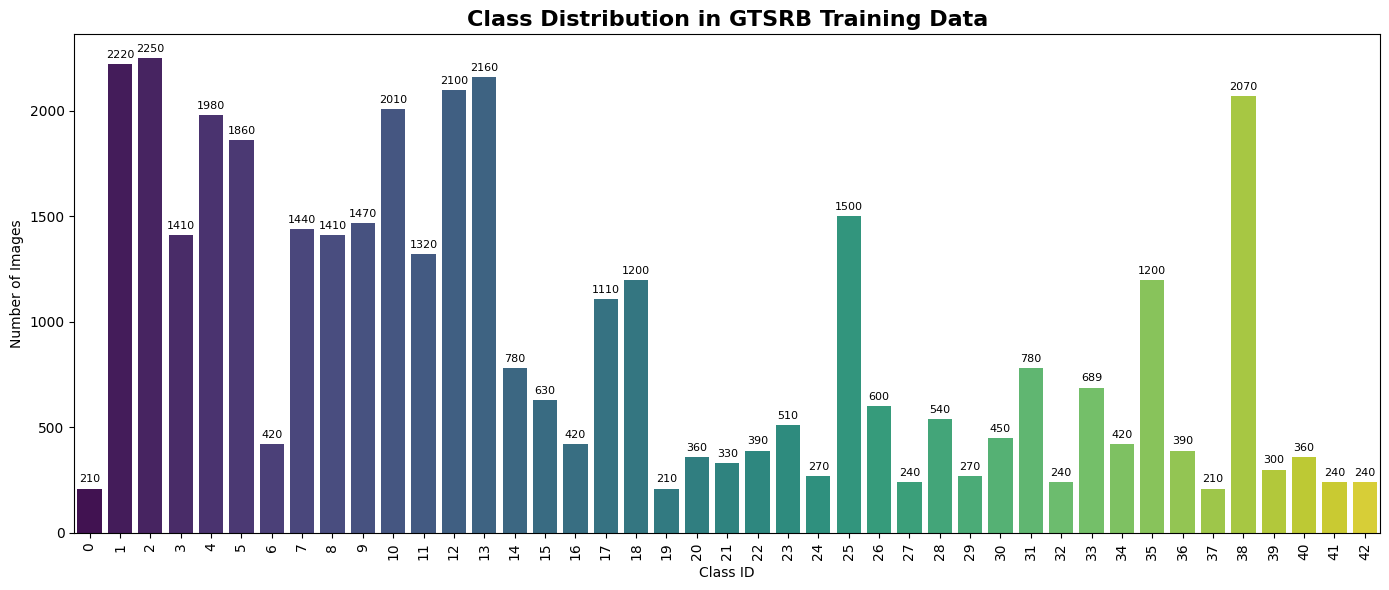

In [28]:
label_counts = df["ClassId"].value_counts().sort_index()


plt.figure(figsize=(14,6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0,3),
                textcoords='offset points')

plt.xticks(rotation=90)
plt.title("Class Distribution in GTSRB Training Data", fontsize=16, fontweight="bold")
plt.ylabel("Number of Images")
plt.xlabel("Class ID")
plt.tight_layout()
plt.show()

Class Co-occurrence

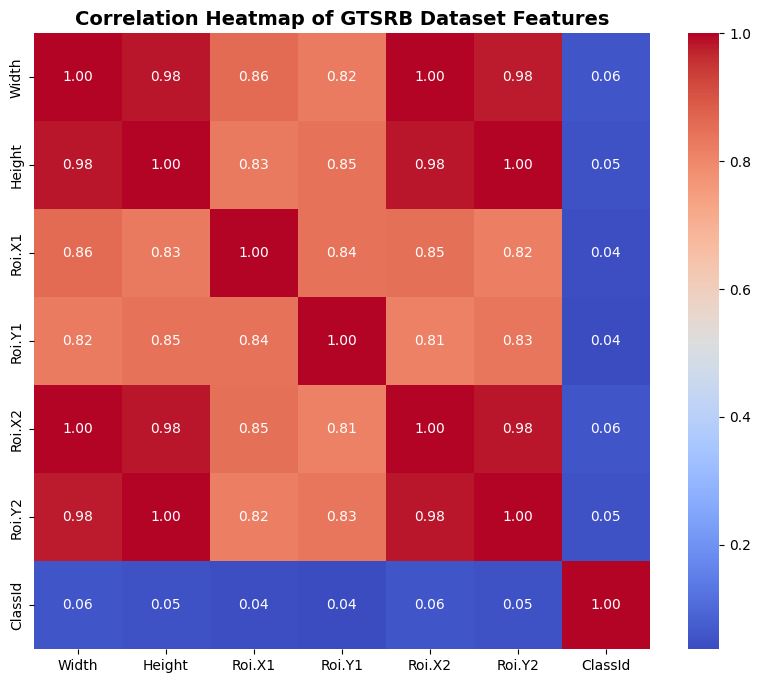

In [29]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of GTSRB Dataset Features", fontsize=14, fontweight="bold")
plt.show()

Data sample presentation 

In [30]:
image_dir = "."  

for class_id in df["ClassId"].unique()[:5]:
    subset = df[df["ClassId"] == class_id]["Path"]
    if len(subset) == 0:
        print(f"No images for class {class_id}")
        continue

 
    sample_images = subset.sample(min(3, len(subset))).values

    plt.figure(figsize=(12, 4))
    for i, img_rel_path in enumerate(sample_images):
        img_path = os.path.join(image_dir, img_rel_path) 
        if os.path.exists(img_path):
            img = cv2.imread(img_path)[:, :, ::-1] 
            plt.subplot(1, len(sample_images), i+1)
            plt.imshow(img)
            plt.title(classes[class_id])
            plt.axis("off")
        else:
            print(f"Missing file: {img_path}")
    plt.show()

Missing file: .\Train/20/00020_00000_00018.png
Missing file: .\Train/20/00020_00009_00003.png
Missing file: .\Train/20/00020_00001_00016.png


<Figure size 1200x400 with 0 Axes>

Missing file: .\Train/0/00000_00004_00008.png
Missing file: .\Train/0/00000_00000_00001.png
Missing file: .\Train/0/00000_00006_00004.png


<Figure size 1200x400 with 0 Axes>

Missing file: .\Train/1/00001_00060_00023.png
Missing file: .\Train/1/00001_00028_00009.png
Missing file: .\Train/1/00001_00031_00008.png


<Figure size 1200x400 with 0 Axes>

Missing file: .\Train/2/00002_00055_00021.png
Missing file: .\Train/2/00002_00056_00001.png
Missing file: .\Train/2/00002_00068_00010.png


<Figure size 1200x400 with 0 Axes>

Missing file: .\Train/3/00003_00040_00021.png
Missing file: .\Train/3/00003_00035_00018.png
Missing file: .\Train/3/00003_00040_00013.png


<Figure size 1200x400 with 0 Axes>

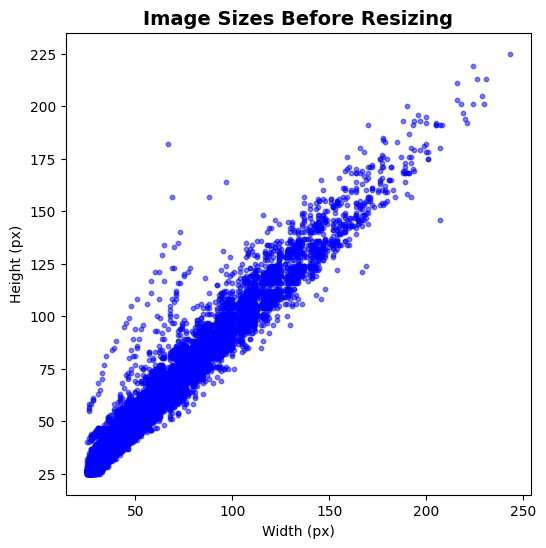

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(df["Width"], df["Height"], alpha=0.5, s=10, color="blue")
plt.title("Image Sizes Before Resizing", fontsize=14, fontweight="bold")
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.show()

Data Preprocessing
-Resize and normalize images for input into deep learning models.
-Implement data augmentation techniques (e.g., rotations, flips, color jittering) to make the 
models more robust to variations in real-world conditions.

In [32]:
balanced_dir = "data/Balanced_Train_Detection"
os.makedirs(balanced_dir, exist_ok=True)

target_per_class = 2000
IMG_SIZE = (64, 64)


df = pd.read_csv("../data/archive/Train.csv")
df.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [33]:
def augment_image(img, bbox):
    augmented = []
    h, w = img.shape[:2]
    x1, y1, x2, y2 = bbox

 
    flipped_img = cv2.flip(img, 1)
    flipped_bbox = [w - x2, y1, w - x1, y2]  
    augmented.append((flipped_img, flipped_bbox))

 
    M1 = cv2.getRotationMatrix2D((w/2, h/2), 15, 1)
    rot_img1 = cv2.warpAffine(img, M1, (w, h))

    augmented.append((rot_img1, bbox))

    
    M2 = cv2.getRotationMatrix2D((w/2, h/2), -15, 1)
    rot_img2 = cv2.warpAffine(img, M2, (w, h))
    augmented.append((rot_img2, bbox))

    return augmented


In [34]:
balanced_records = []

for class_id in tqdm(df["ClassId"].unique(), desc="Balancing classes"):
    class_subset = df[df["ClassId"] == class_id]
    images = list(class_subset["Path"].values)

    balanced_images = []
    balanced_bboxes = []
    idx = 0

    while len(balanced_images) < target_per_class:
        row = class_subset.iloc[idx % len(class_subset)]
        img_path = row["Path"]
        x1, y1, x2, y2 = row[["Roi.X1", "Roi.Y1", "Roi.X2", "Roi.Y2"]].values.astype(int)

        img = cv2.imread(img_path)
        if img is None:
            idx += 1
            continue

        
        h, w = img.shape[:2]
        img = cv2.resize(img, IMG_SIZE)
        scale_x, scale_y = IMG_SIZE[0] / w, IMG_SIZE[1] / h
        new_bbox = [int(x1*scale_x), int(y1*scale_y), int(x2*scale_x), int(y2*scale_y)]

   
        balanced_images.append(img)
        balanced_bboxes.append(new_bbox)

 
        for aug_img, aug_bbox in augment_image(img, new_bbox):
            if len(balanced_images) < target_per_class:
                balanced_images.append(aug_img)
                balanced_bboxes.append(aug_bbox)

        idx += 1

   
    class_dir = os.path.join(balanced_dir, str(class_id))
    os.makedirs(class_dir, exist_ok=True)

    for i, (img, bbox) in enumerate(zip(balanced_images, balanced_bboxes)):
        save_path = os.path.join(class_dir, f"{class_id}_{i}.png")
        cv2.imwrite(save_path, img)
        balanced_records.append([save_path, class_id, *bbox])


Balancing classes:   0%|          | 0/43 [20:39<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
balanced_df = pd.DataFrame(balanced_records, columns=["Path", "ClassId", "X1", "Y1", "X2", "Y2"])
balanced_df = shuffle(balanced_df, random_state=42)
balanced_df.to_csv("data/Balanced_Train_Detection.csv", index=False)

print("✅ Done! Balanced dataset for Object Detection saved with augmentations + bounding boxes.")
balanced_df.head()


✅ Done! Balanced dataset for Object Detection saved with augmentations + bounding boxes.


,Path,ClassId,X1,Y1,X2,Y2
29338,Balanced_Train_Detection\13\13_1338.png,13,9,8,56,56
30527,Balanced_Train_Detection\14\14_527.png,14,8,6,57,57
77153,Balanced_Train_Detection\38\38_1153.png,38,7,7,56,57
70108,Balanced_Train_Detection\35\35_108.png,35,5,5,58,58
84928,Balanced_Train_Detection\42\42_928.png,42,6,7,57,57


In [ ]:
bdf=pd.read_csv("data/Balanced_Train_Detection.csv")
bdf["ClassId"].value_counts()

ClassId
13    2000
0     2000
12    2000
8     2000
10    2000
33    2000
5     2000
25    2000
3     2000
2     2000
40    2000
20    2000
9     2000
34    2000
28    2000
7     2000
23    2000
4     2000
24    2000
39    2000
31    2000
18    2000
14    2000
26    2000
38    2000
35    2000
42    2000
30    2000
15    2000
21    2000
27    2000
22    2000
32    2000
6     2000
11    2000
41    2000
16    2000
17    2000
19    2000
29    2000
37    2000
1     2000
36    2000
Name: count, dtype: int64

Class Distribution after data balancing 

C:\Users\megor\AppData\Local\Temp\ipykernel_48096\25115563.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


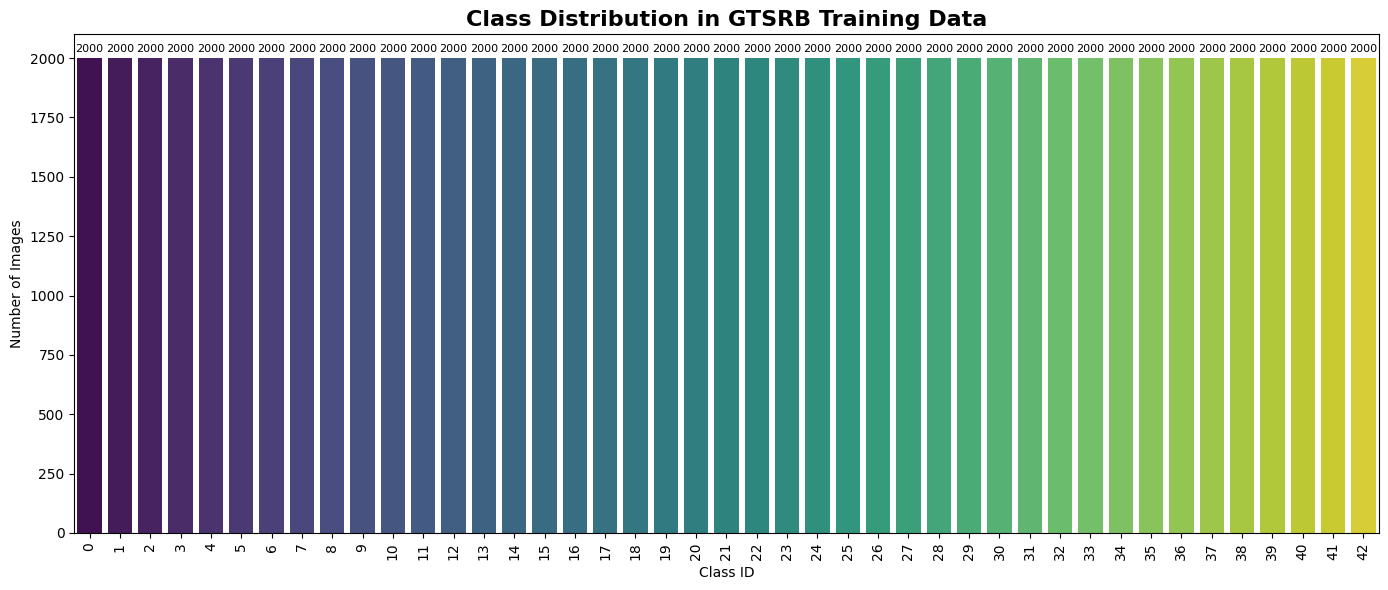

In [ ]:
label_counts = bdf["ClassId"].value_counts().sort_index()


plt.figure(figsize=(14,6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0,3),
                textcoords='offset points')

plt.xticks(rotation=90)
plt.title("Class Distribution in GTSRB Training Data", fontsize=16, fontweight="bold")
plt.ylabel("Number of Images")
plt.xlabel("Class ID")
plt.tight_layout()
plt.show()

Sample Represintation after Implementing data augmentation techniques (e.g., rotations, flips)

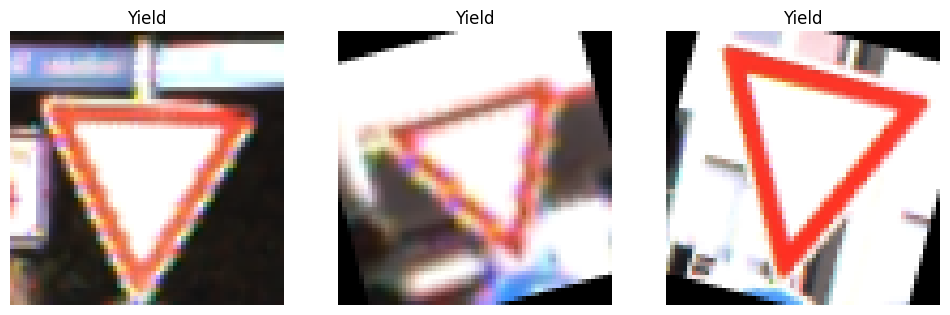

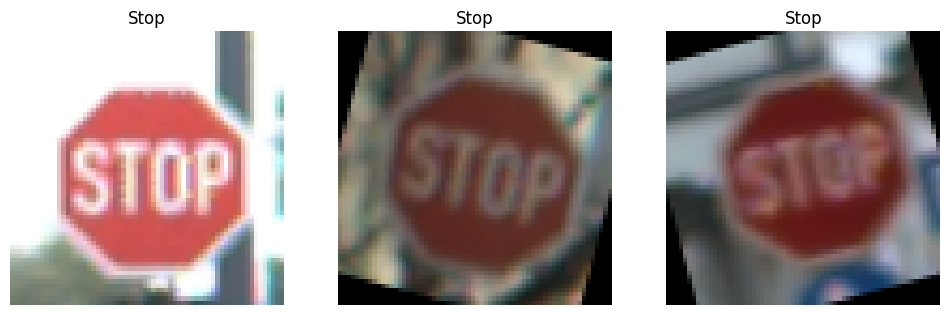

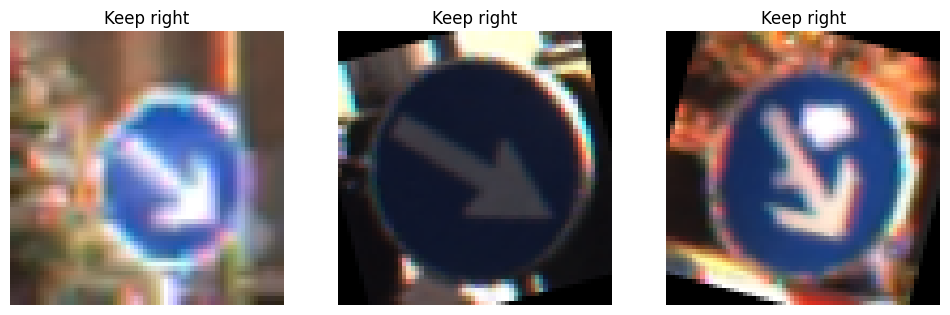

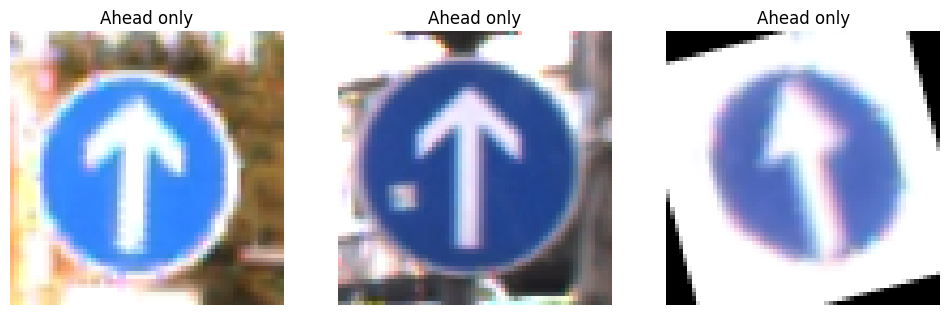

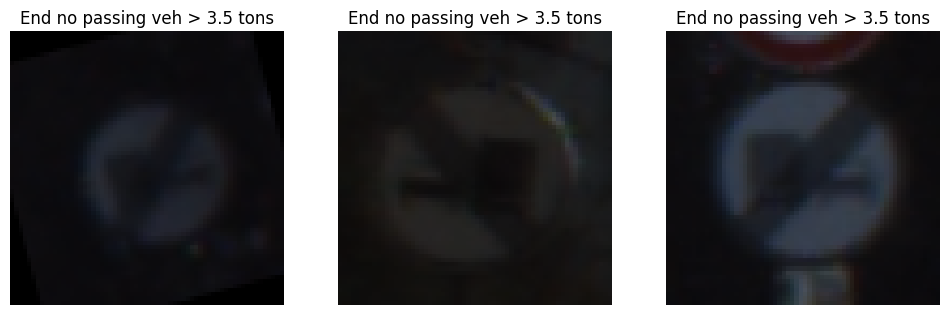

In [ ]:
image_dir = "."  

for class_id in bdf["ClassId"].unique()[:5]:
    subset = bdf[df["ClassId"] == class_id]["Path"]
    if len(subset) == 0:
        print(f"No images for class {class_id}")
        continue

 
    sample_images = subset.sample(min(3, len(subset))).values

    plt.figure(figsize=(12, 4))
    for i, img_rel_path in enumerate(sample_images):
        img_path = os.path.join(image_dir, img_rel_path) 
        if os.path.exists(img_path):
            img = cv2.imread(img_path)[:, :, ::-1] 
            plt.subplot(1, len(sample_images), i+1)
            plt.imshow(img)
            plt.title(classes[class_id])
            plt.axis("off")
        else:
            print(f"Missing file: {img_path}")
    plt.show()

Data normalization 
save images as .npy instead of .png to be ready for traning 

In [ ]:
balanced_df = pd.read_csv("../data/Balanced_Train_Detection.csv")
normalized_dir = "Normalized_Train"
os.makedirs(normalized_dir, exist_ok=True)

normalized_records = []

for idx, row in tqdm(balanced_df.iterrows(), total=len(balanced_df), desc="Normalizing images"):
    img_path = row["Path"]
    class_id = row["ClassId"]

    
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = img.astype("float32") / 255.0

    class_dir = os.path.join(normalized_dir, str(class_id))
    os.makedirs(class_dir, exist_ok=True)
    save_path = os.path.join(class_dir, os.path.basename(img_path).replace(".png", ".npy"))
    np.save(save_path, img)

 
    normalized_records.append([save_path, class_id])

normalized_df = pd.DataFrame(normalized_records, columns=["Path", "ClassId"])
normalized_df.to_csv("Normalized_Train.csv", index=False)

print("Done! All images normalized and saved as .npy")

Normalizing images: 100%|██████████| 86000/86000 [28:03<00:00, 51.07it/s]   


Done! All images normalized and saved as .npy
